# Mircrograd from scratch
 - These notebooks/docs are created when going through the lessons of zero to hero taught by andrej karpathy

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from rich import print
from rich import pretty

In [2]:
pretty.install()

## Single Variable: `x`

Create a function

In [3]:
def f(x): return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

In [5]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

Plot the function

[<matplotlib.lines.Line2D object at 0x7f9966d06890>]

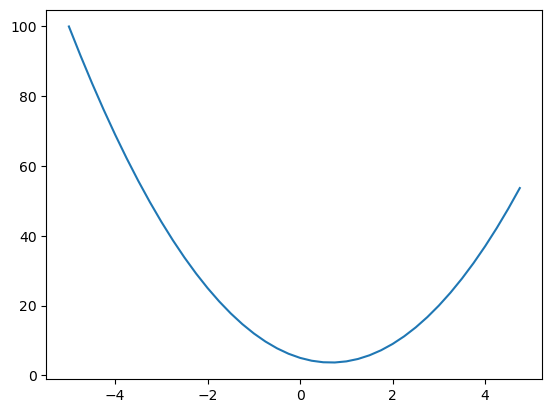

In [7]:
plt.plot(xs, ys)

### Derivative on increasing side of the curve

In [8]:
h = 0.0000000001
x = 3.0
(f(x + h) - f(x))/h

14.000001158365194

### Derivative on the decreasing side of the curve

In [9]:
h = 0.0000000001
x = -3.0
(f(x + h) - f(x))/h

-21.999966293151374

### Derivative on the bottom of the curve

In [10]:
h = 0.0000000001
x = 2/3
(f(x + h) - f(x))/h

0.0

## Multivariable: `a`, `b`, `c` 

In [11]:
a = 2.0
b = -3.0
c = 10.0
def d(a, b, c): return a*b + c
print(d(a, b, c))

4.0

### Derivative with respect to `a`

In [12]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = d(a, b, c)

a += h
d2 = d(a, b, c)


print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0

d2 3.999699999999999

slope -3.000000000010772

### Derivative with respect to `b` 

In [13]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = d(a, b, c)

b += h
d2 = d(a, b, c)


print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0

d2 4.0002

slope 2.0000000000042206

### Derivative with respect to `c`

In [14]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = d(a, b, c)

c += h
d2 = d(a, b, c)


print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0

d2 4.0001

slope 0.9999999999976694

## Create Value Object
(mentioned in the README of [micrograd](https://github.com/karpathy/micrograd) )

### Define intial template of Value Class

In [15]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

In [16]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

### Add the `add` function

In [17]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other): # ⭠ for adding among the value objects
        return Value(self.data + other.data)

In [18]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

In [19]:
a + b # a.__add__(b)

Value(data=-1.0)

### Add the `mul` function

In [20]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data)

    def __mul__(self, other): # ⭠ for multiplying among the value objects
        return Value(self.data * other.data)

In [21]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

In [22]:
a * b # a.__mul__(b)

Value(data=-6.0)

In [23]:
c = Value(10.0)

In [24]:
d = a * b + c; d

Value(data=4.0)

### Add the functionality to know what values created a value with `_children`

In [25]:
class Value:
    def __init__(self, data, _children=()): # ⭠ Add _children
        self.data = data
        self._prev = set(_children) # ⭠ Add _children

    def __repr__(self):
        return f"Value(data ={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other))

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other))

In [26]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d

Value(data =4.0)

In [27]:
d._prev # childrens are -6.0 (a *b) and 10.0 (c)

{Value(data =-6.0), Value(data =10.0)}

### Add the functionality to know what operations created a value with `_op`

In [28]:
class Value:
    def __init__(self, data, _children=(), _op=''): # ⭠ Add _op
        self.data = data
        self._prev = set(_children)
        self._op = _op # ⭠ Add _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

In [29]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d

Value(data=4.0)

In [30]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [31]:
d._op

'+'

### Visualize the expression graph with operators and operands

In [32]:
from graphviz import Digraph

def trace(root):
    # build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

In [33]:
def draw_dot(root, label):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label=label(n), shape='record') # ⭠ label function getting called
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
  
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
  
    return dot

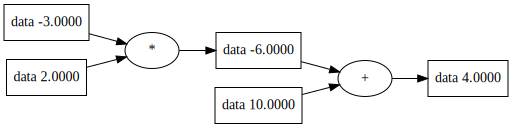

In [34]:
def label(node): return "{data %.4f}" % (node.data)
draw_dot(d, label)

### Add label to each node
> so that we know what are the corresponding variables for each value

In [35]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''): # ⭠ Add label
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label # ⭠ Add label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

In [36]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label='b')
c = Value(10, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(label=L data=-8.0)

Change the `label` function to render the label

In [37]:
def label(node): return "{%s | {data %.4f}}" % (node.label, node.data)

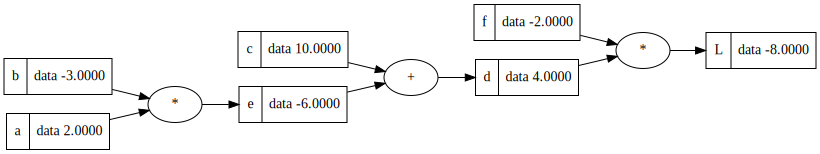

In [38]:
draw_dot(L, label)

### Add `grad` to `Value` class

In [39]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

In [40]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label='b')
c = Value(10, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L.grad

0.0

In [41]:
def label(node): return "{%s | {data %.4f} | grad %.4f}" % (node.label, node.data, node.grad)

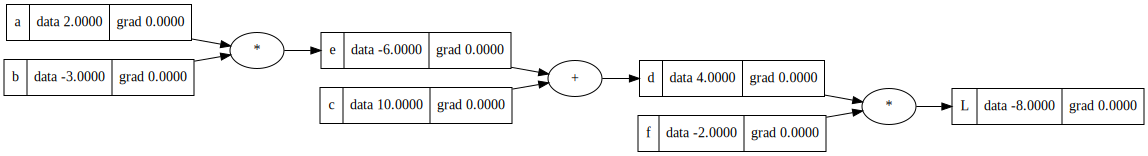

In [42]:
draw_dot(L, label)

### Create a function `lol` 
#### Derive with respect to `a`

In [43]:
def lol():
    h = 0.0001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0 + h, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

6.000000000021544

#### Derive with respect to `L`

In [44]:
def lol():
    h = 0.0001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data + h

    print((L2 - L1) / h)

lol()

0.9999999999976694

In [45]:
L.grad = 1

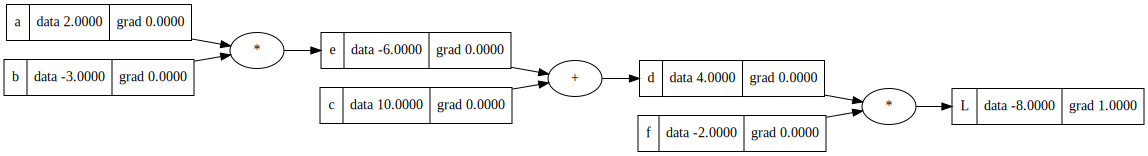

In [46]:
draw_dot(L, label)


#### Derivative of `L` with respect to `f`

$$ L = f \cdot d $$

$$ \frac{\partial L}{\partial f} = \frac{\partial (f \cdot d)}{\partial f} = d = 4.0 $$



In [47]:
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0 + h, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

3.9999999999995595

In [48]:
f.grad = 4

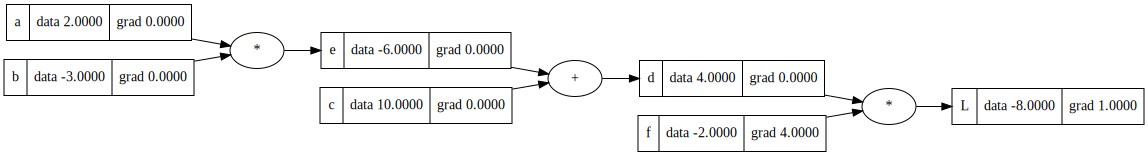

In [49]:
draw_dot(L, label)


#### Derivative of `L` with respect to `d`

$$ \frac{\partial L}{\partial d} = \frac{\partial (f \cdot d)}{\partial d} = f = -2.0 $$


In [50]:
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    d.data += h
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

-2.000000000000668

In [51]:
d.grad = -2

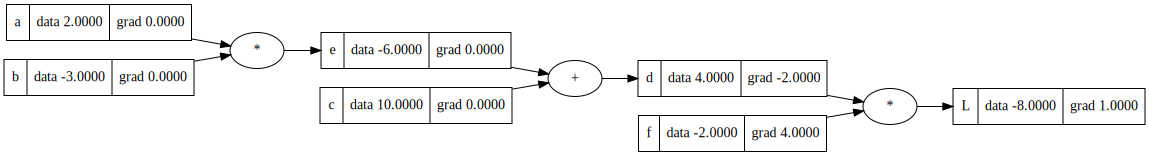

In [52]:
draw_dot(L, label)

#### Derivative of `L` with respect to `c`

$$ \frac{\partial d}{\partial c} = \frac{\partial (c + e)}{\partial c} = 1.0 $$

$$ \frac{\partial L}{\partial c} = \frac{\partial L}{\partial d}\cdot\frac{\partial d}{\partial c} = f = -2.0 $$

In [53]:
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10 + h, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

-1.9999999999988916

In [54]:
c.grad = -2

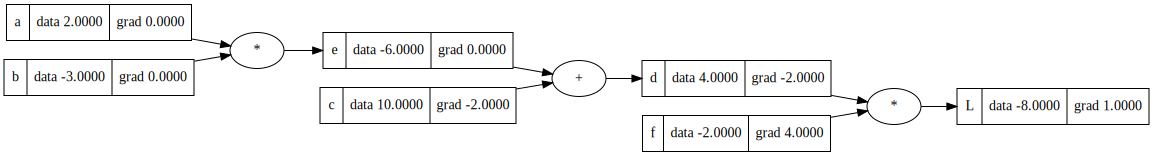

In [55]:
draw_dot(L, label)

#### Derivative of `L` with respect to `e`

$$ \frac{\partial d}{\partial e} = \frac{\partial (c + e)}{\partial e} = 1.0 $$

$$ \frac{\partial L}{\partial e} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial e} = f = -2.0 $$

In [56]:
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    e.data += h
    
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

-2.000000000000668

In [57]:
e.grad = -2

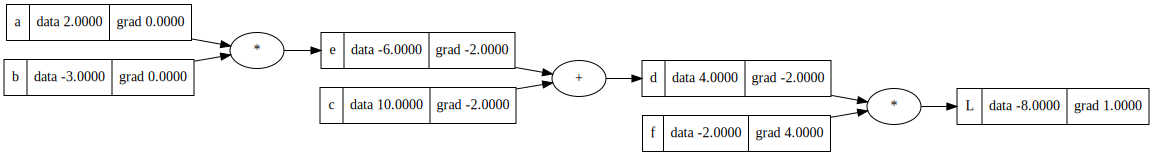

In [58]:
draw_dot(L, label)

#### Derivative of `L` with respect to `a`

$$ \frac{\partial e}{\partial a} = \frac{\partial ({a}\cdot{b})}{\partial a} = b $$

$$ \frac{\partial L}{\partial a} = \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial a} = -2b = 6 $$

In [59]:
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0 + h, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

6.000000000000227

In [60]:
a.grad = 6

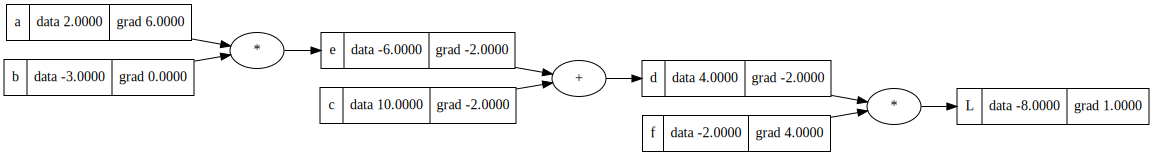

In [61]:
draw_dot(L, label)

#### Derivative of `L` with respect to `b`

$$ \frac{\partial e}{\partial b} = \frac{\partial ({a}\cdot{b})}{\partial b} = a $$

$$ \frac{\partial L}{\partial b} = \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial b}= -2a = -4 $$

In [62]:
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label = 'a')
    b = Value(-3.0 + h, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

-3.9999999999995595

In [63]:
b.grad = -4

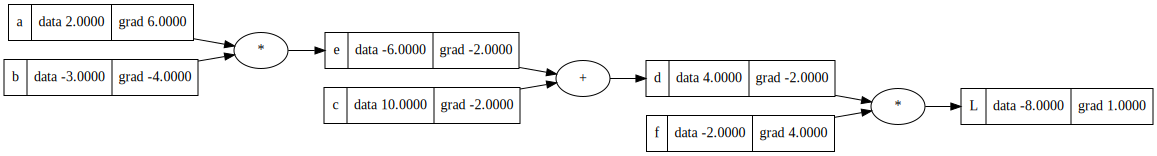

In [64]:
draw_dot(L, label)

In [65]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

In [66]:
e = a * b
d = e + c
L = d * f
print(L.data)

-7.286496

## Neural Network

### Tanh

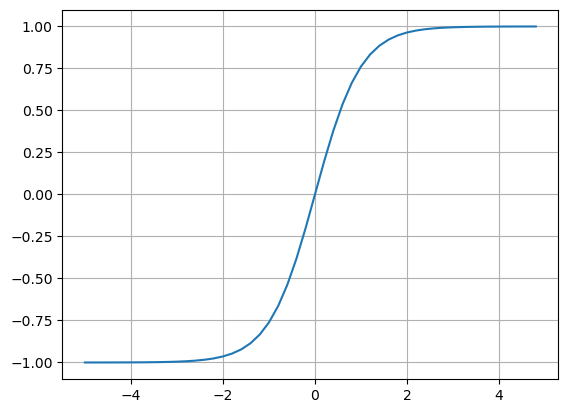

In [67]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

### Add `tanh`

In [68]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        return out

### Inputs: x1, x2

In [69]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

### Weights: w1, w2

In [70]:
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

### Bias

In [71]:
b = Value(6.8813735870195432, label='b')

### x1w1 + x2w2 + b

In [72]:
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'

In [74]:
o = n.tanh(); o.label = 'o'

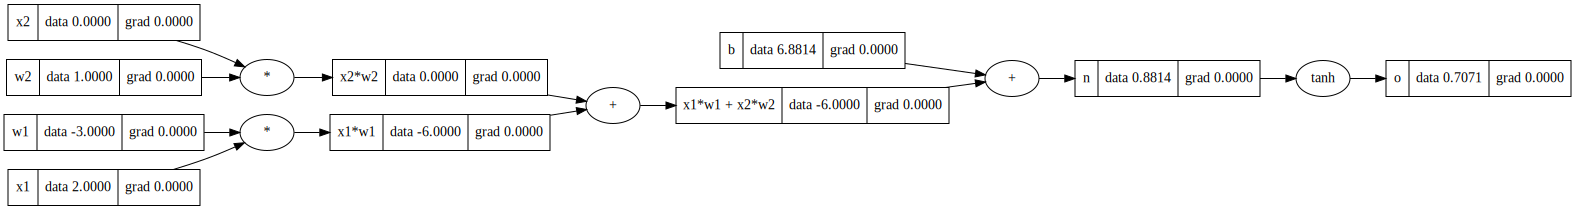

In [75]:
draw_dot(o, label)

### Manual Backpropagation

$$ \frac{\partial o}{\partial o} = 1 $$

In [76]:
o.grad = 1.0

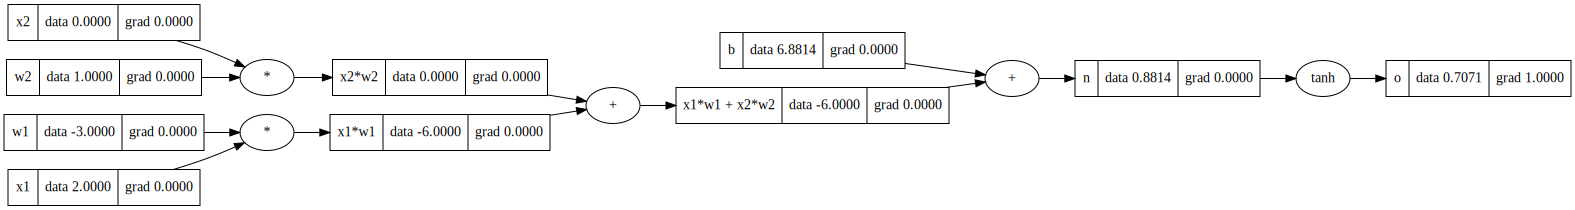

In [77]:
draw_dot(o, label)

$$ o = \tanh(n) $$
$$ \frac{\partial o}{\partial n} = \frac{\partial{\tanh(n)}}{\partial n} = 1 - \tanh(n)^2 = 1 - o^2 $$

In [78]:
1 - (o.data ** 2)

0.4999999999999999

In [79]:
n.grad = 0.5

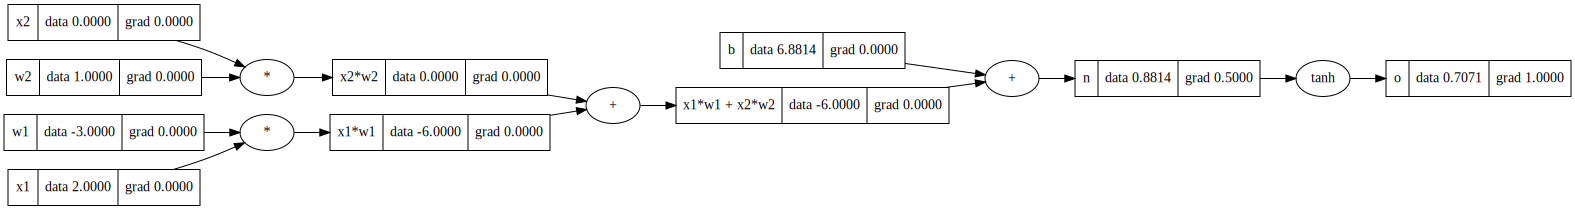

In [80]:
draw_dot(o, label)

> With pluses as we saw the gradient will be same as previous gradient

In [81]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

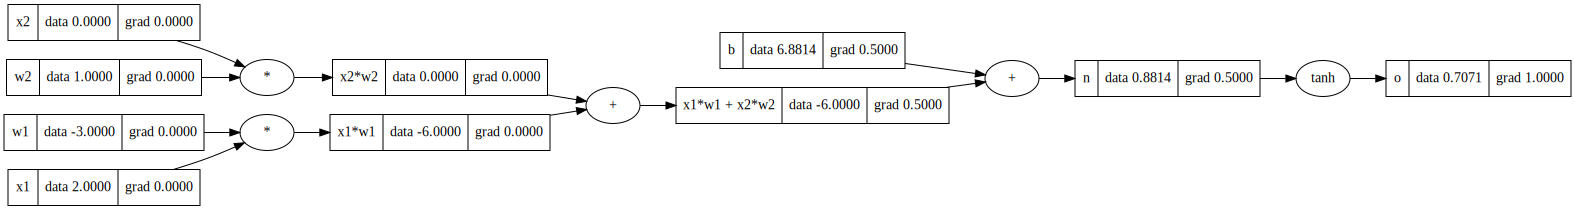

In [82]:
draw_dot(o, label)

In [83]:
x1w1.grad = 0.5
x2w2.grad = 0.5

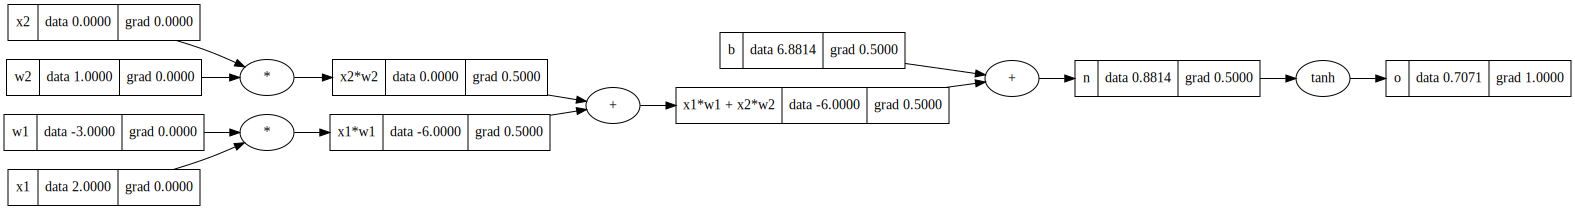

In [84]:
draw_dot(o, label)

In [85]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

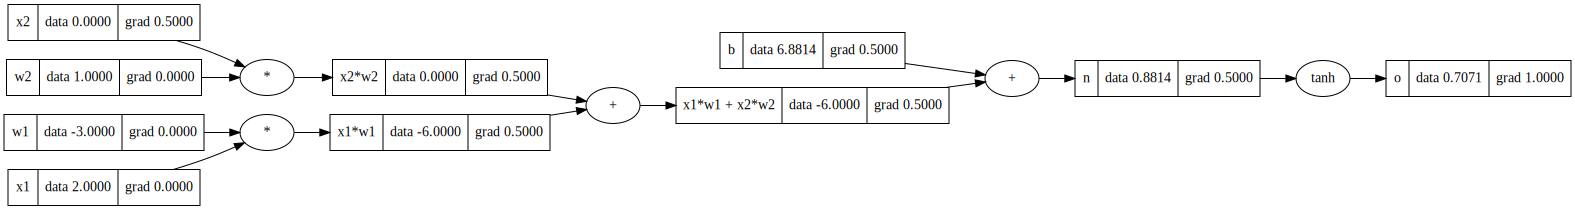

In [86]:
draw_dot(o, label)

In [87]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

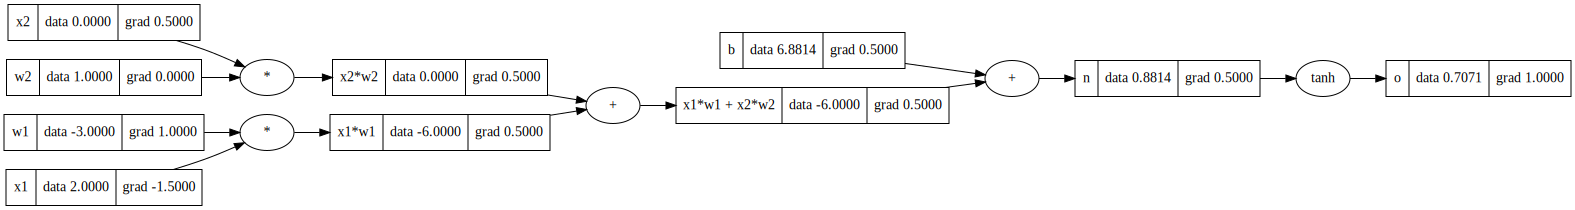

In [88]:
draw_dot(o, label)

### Automate the backward propagation

In [90]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self.backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out.backward = _backward

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        return out